In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

%matplotlib inline

In [3]:
filename_IRR_IMU = '/home/brenda/Documents/caramel_ws/src/bir-black-mouth-docs/data/Tests/ang_vel_stab_irregular_IMU/stability_velocity_irregular_imu.csv'
filename_IRR_NOIMU = '/home/brenda/Documents/caramel_ws/src/bir-black-mouth-docs/data/Tests/ang_vel_stab_irregular_NO_IMU/stability_velocity_irregular.csv'
df_irr_imu = pd.read_csv(filename_IRR_IMU)
df_irr_noimu = pd.read_csv(filename_IRR_NOIMU)

df_irr_imu.drop('estabilidade', axis=1, inplace=True)
df_irr_noimu.drop('estabilidade', axis=1, inplace=True)

## Outliers


In [5]:
def make_outliers_nan(df):
    for col in df.columns:
        q75, q25 = np.percentile(df[col], [75, 25])
        intr_qr = q75-q25
        UW = q75+(1.5*intr_qr)
        LW = q25-(1.5*intr_qr)

        df.loc[df[col] < LW, col] = np.nan
        df.loc[df[col] > UW, col] = np.nan
    
    return df


In [6]:
df_irr_imu_ol = make_outliers_nan(df_irr_imu.take(range(10)).copy())
df_irr_noimu_ol = make_outliers_nan(df_irr_noimu.take(range(10)).copy())

In [7]:
df_irr_imu_ol.iloc[:,0]

0    32.299319
1    34.951399
2    33.321568
3    31.834610
4    33.977046
5    32.274966
6    31.972529
7    33.791023
8    31.929101
9    31.590379
Name: tempo, dtype: float64

In [8]:
df_irr_imu_ol.insert(2, 'angl_vel', 2 * np.pi / df_irr_imu_ol.iloc[:,0])
df_irr_imu_ol.describe()

,tempo,roll_max,angl_vel,roll_min,roll_oscilation,pitch_max,pitch_min,pitch_oscilation
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000,10.000000
mean,32.794194,12.435581,0.191797,-4.406643,16.842224,6.682198,-6.191180,12.894165
std,1.136879,2.587666,0.006507,1.217220,2.600448,0.938429,0.452325,1.414452
min,31.590379,8.657327,0.179769,-6.002727,12.376930,5.005591,-6.701403,11.037637
25%,31.939958,10.668597,0.186597,-5.553628,15.044277,6.216042,-6.525431,11.704734
50%,32.287142,12.442538,0.194603,-4.252556,16.935062,6.475353,-6.261505,12.566948
75%,33.673659,14.287323,0.196719,-3.349039,18.495920,7.174525,-5.981570,14.213614
max,34.951399,16.497088,0.198896,-2.831204,20.344436,8.326334,-5.357396,14.817298


In [9]:
df_irr_noimu_ol.insert(2, 'angl_vel', 2 * np.pi / df_irr_noimu_ol.iloc[:,0])
df_irr_noimu_ol.describe()

,tempo,roll_max,angl_vel,roll_min,roll_oscilation,pitch_max,pitch_min,pitch_oscilation
count,9.000000,8.000000,9.000000,8.000000,9.000000,10.000000,10.000000,9.000000
mean,32.989293,12.999108,0.190607,-4.799019,16.155986,5.703433,-5.753426,11.787855
std,0.956961,1.475810,0.005649,0.802316,1.877092,1.054281,1.021689,1.051617
min,31.053127,11.536404,0.184047,-5.645312,13.530452,3.941836,-7.501915,10.084741
25%,32.622262,11.947628,0.185764,-5.446696,14.228405,4.795981,-6.069393,11.176038
50%,33.007941,12.488422,0.190354,-4.805737,16.683643,5.962256,-5.755174,11.587296
75%,33.823459,13.932863,0.192604,-4.410407,16.932968,6.363823,-4.944493,12.180343
max,34.138962,15.337859,0.202337,-3.302950,19.310708,6.951171,-4.485889,13.535689


## Test Normal

In [10]:
for col in df_irr_imu_ol.columns:
    print(col.upper())
    print('Irregular:')
    a = stats.shapiro(df_irr_imu_ol[col].dropna())
    b = stats.shapiro(df_irr_noimu_ol[col].dropna())
    print(a)
    print(b,'\n')

TEMPO
Irregular:
ShapiroResult(statistic=0.8796310424804688, pvalue=0.12922638654708862)
ShapiroResult(statistic=0.9346476197242737, pvalue=0.5268164873123169) 

ROLL_MAX
Irregular:
ShapiroResult(statistic=0.9612258076667786, pvalue=0.7997555136680603)
ShapiroResult(statistic=0.8794512152671814, pvalue=0.18606621026992798) 

ANGL_VEL
Irregular:
ShapiroResult(statistic=0.8860667943954468, pvalue=0.1530667394399643)
ShapiroResult(statistic=0.9227184653282166, pvalue=0.41522207856178284) 

ROLL_MIN
Irregular:
ShapiroResult(statistic=0.8703693151473999, pvalue=0.10096119344234467)
ShapiroResult(statistic=0.8979926109313965, pvalue=0.2771419584751129) 

ROLL_OSCILATION
Irregular:
ShapiroResult(statistic=0.961280345916748, pvalue=0.8003683090209961)
ShapiroResult(statistic=0.8901849389076233, pvalue=0.2004033625125885) 

PITCH_MAX
Irregular:
ShapiroResult(statistic=0.9665907621383667, pvalue=0.8575624823570251)
ShapiroResult(statistic=0.9110567569732666, pvalue=0.28832870721817017) 

PITCH_M

## ANOVA

In [11]:
# IRREGULAR TERRAIN
print(stats.f_oneway(df_irr_imu_ol["roll_oscilation"].dropna(), df_irr_noimu_ol["roll_oscilation"].dropna()))
print(stats.f_oneway(df_irr_imu_ol["pitch_oscilation"].dropna(), df_irr_noimu_ol["pitch_oscilation"].dropna()))

F_onewayResult(statistic=0.42585247059231673, pvalue=0.5227583837198252)
F_onewayResult(statistic=3.6702366227863474, pvalue=0.07236648811108366)


In [12]:
(2 * np.pi / df_irr_imu_ol["tempo"]).describe()

count    10.000000
mean      0.191797
std       0.006507
min       0.179769
25%       0.186597
50%       0.194603
75%       0.196719
max       0.198896
Name: tempo, dtype: float64

In [13]:
(2 * np.pi / df_irr_noimu_ol["tempo"]).describe()


count    9.000000
mean     0.190607
std      0.005649
min      0.184047
25%      0.185764
50%      0.190354
75%      0.192604
max      0.202337
Name: tempo, dtype: float64

In [14]:
stats.f_oneway((2 * np.pi / df_irr_imu_ol["tempo"]).dropna(),
               (2 * np.pi / df_irr_noimu_ol["tempo"]).dropna())

F_onewayResult(statistic=0.17933243961847506, pvalue=0.6772568284609315)

## Plots

In [15]:
def resize_cols(df, N):
    dict = {}
    for col in df.columns:
        dict[col] = np.nan
    for _ in range(N-df.shape[0]):
        df_tmp = pd.DataFrame(dict, index=[df.shape[0]])
        df = df.append(df_tmp)
    return df

Text(0.5, 0, 'Pitch')

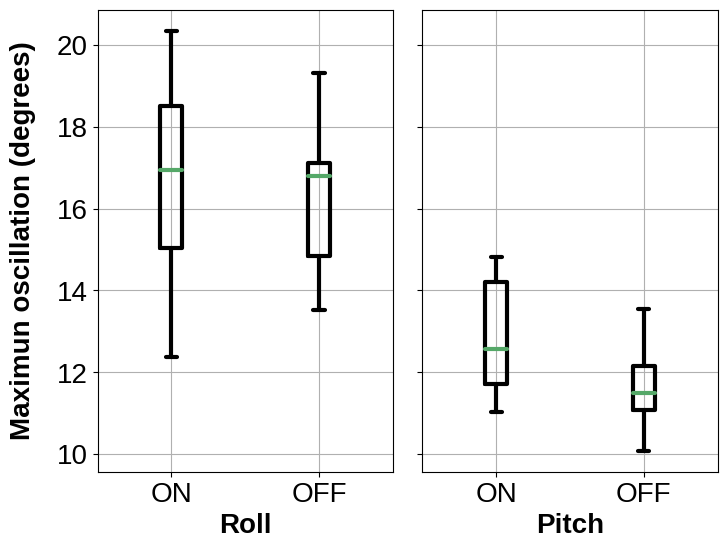

In [16]:
df_irregular_roll = pd.DataFrame()
df_irregular_roll['ON'] = df_irr_imu['roll_oscilation'].values
df_irregular_roll['OFF'] = df_irr_noimu['roll_oscilation'].values

df_irregular_pitch = pd.DataFrame()
df_irregular_pitch['ON'] = df_irr_imu['pitch_oscilation'].values
df_irregular_pitch['OFF'] = df_irr_noimu['pitch_oscilation'].values

fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(8,6)
fig.subplots_adjust(wspace=0.1)
plt.style.use("seaborn")

boxprops = dict(linestyle='-',
                linewidth=3)
medianprops = dict(linestyle='-',
                   linewidth=3)
whiskerprops = dict(linestyle='-',
                    linewidth=3)
capprops = dict(linestyle='-',
                linewidth=3)

df_irregular_roll.boxplot(boxprops=boxprops,
                          medianprops=medianprops,
                          whiskerprops=whiskerprops,
                          capprops=capprops,
                          showfliers=False,
                          fontsize=20,
                          ax=ax[0])

df_irregular_pitch.boxplot(boxprops=boxprops,
                           medianprops=medianprops,
                           whiskerprops=whiskerprops,
                           capprops=capprops,
                           showfliers=False,
                           fontsize=20,
                           ax=ax[1])

ax[0].set_ylabel('Maximun oscillation (degrees)', fontsize=20, fontweight='bold', labelpad=15)
ax[0].set_xlabel('Roll', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Pitch', fontsize=20, fontweight='bold')